# Proyek Analisis Data: Bike Sharing Dataset -> day.csv
- **Nama:** Fauzi Kurniawan
- **Email:** kirigaya.kurniawan@gmail.com
- **ID Dicoding:** fauzi_kurniawan26

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penggunaan sepeda pada hari libur vs hari biasa?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset menyediakan informasi yang memungkinkan kita membedakan penggunaan sepeda pada hari kerja dan hari libur. Ini merupakan peluang untuk melakukan analisis perilaku pengguna berdasarkan konteks waktu.

- Dataset juga memuat informasi terkait musim (season), yang dapat digunakan untuk menganalisis pengaruh cuaca atau kondisi musim terhadap intensitas penyewaan sepeda.

### Assessing Data

Kita akan melakukan evaluasi dan mencari issue masalah yang mungkin terdapat pada data.

In [24]:
# Get Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [25]:
# Missing Value Identification


df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [26]:
# Identification Duplicate Data

df.duplicated().sum()

np.int64(0)

In [27]:
# Outlier Data Identification

q25, q75 = np.percentile(df['cnt'], 25), np.percentile(df['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers_df = df[(df['cnt'] < minimum) | (df['cnt'] > maximum)]
outliers_df.shape

(0, 16)

### Cleaning Data

In [28]:
# Drop Missing value

df.dropna(axis=0, inplace=True)

In [29]:
# Drop Outlier value

Q1 = (df['cnt']).quantile(0.25)
Q3 = (df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['cnt'] < minimum
kondisi_more_than = df['cnt'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

In [30]:
# Drop duplicate value

df.drop_duplicates(inplace=True)

**Insight:**
- Dataset terdiri dari 731 baris data, yang kemungkinan merepresentasikan jumlah hari dalam dua tahun (365 + 365 = 730). Oleh karena itu, data ini dapat digunakan sebagai time series untuk menganalisis tren penyewaan sepeda selama dua tahun terakhir.

- Data yang tersedia tergolong bersih, sehingga tidak diperlukan proses pembersihan data maupun penanganan duplikasi.

- Pada kolom ```cnt```, tidak ditemukan nilai ekstrem (outlier). Hal ini menunjukkan bahwa distribusi nilai cukup stabil, dan semua kolom memiliki data yang valid.

- Proses data cleaning bersifat minimal, lebih sebagai langkah formalitas, karena dataset sudah layak untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [32]:
df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
          max   min         mean          std
holiday                                      
0        8714    22  4527.104225  1929.013947
1        7403  1000  3735.000000  2103.350660

**Insight 1:**
- Penggunaan sepeda cenderung lebih tinggi pada hari biasa (holiday = 0), dengan rata-rata 4.527 pengguna per hari, dibandingkan dengan 3.735 pengguna per hari pada hari libur nasional (holiday = 1).
- Jumlah pengguna maksimum pada hari biasa mencapai 8.714, jauh lebih tinggi dibandingkan hari libur yaitu 7.403.
- Pengguna minimum juga berbeda jauh: hanya 22 pengguna pada hari biasa, sedangkan hari libur memiliki minimum 1.000 pengguna.
- Menariknya, standar deviasi (sebaran) justru lebih besar pada hari libur (2103) dibandingkan hari biasa (1929), yang mengindikasikan bahwa fluktuasi pengguna pada hari libur lebih tidak stabil dan bervariasi.

In [33]:
weather_labels = {
    1: 'Cerah',
    2: 'Awan Mendung',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat / Badai Petir'
}
df['weather_label'] = df['weathersit'].map(weather_labels)

df.groupby(by="weather_label").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
                max  min         mean          std
weather_label                                     
Awan Mendung   8362  605  4035.862348  1809.109918
Cerah          8714  431  4876.786177  1879.483989
Hujan Ringan   4639   22  1803.285714  1240.284449

**Insight 2:**
- Penggunaan sepeda memiliki volume cukup tinggi pada hari yang cerah, dengan rata-rata 4.876 pengguna per hari, dibandingkan dengan cuaca Hujan ringan dengan pengguna 1803 pengguna per hari.
- Jumlah pengguna pada hari cerah bisa sampai 8714 pengguna, jumlah pengguna tertinggi pada hari mendung mencapai 8.362, sedangkan pada hari hujan ringan hanya 4.639.
- Ironisnya pengguna harian pada saat hari hujan ringan paling sedikit hanya sampai 22 pengguna saja, cukup jauh perbandingannya dibandingkan pengguna pada cuaca mendung maupun cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

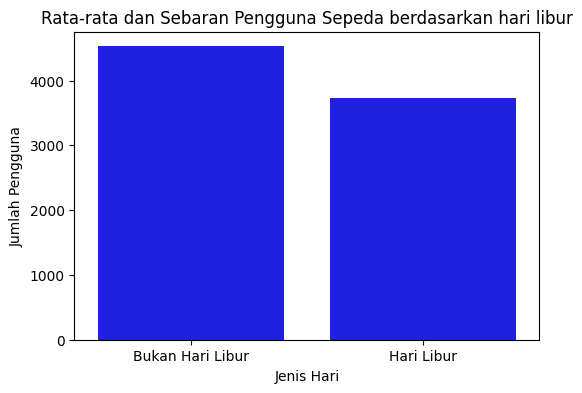

In [34]:
# Ambil mean dan std
agg_data = df.groupby("holiday")["cnt"].agg(["mean", "std"]).reset_index()
agg_data["holiday_label"] = agg_data["holiday"].map({0: "Bukan Hari Libur", 1: "Hari Libur"})

# Plot dengan error bar
plt.figure(figsize=(6,4))
sns.barplot(x="holiday_label", y="mean", data=agg_data, color="blue")
plt.title("Rata-rata dan Sebaran Pengguna Sepeda berdasarkan hari libur")
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Jenis Hari")
plt.show()

### Pertanyaan 2:

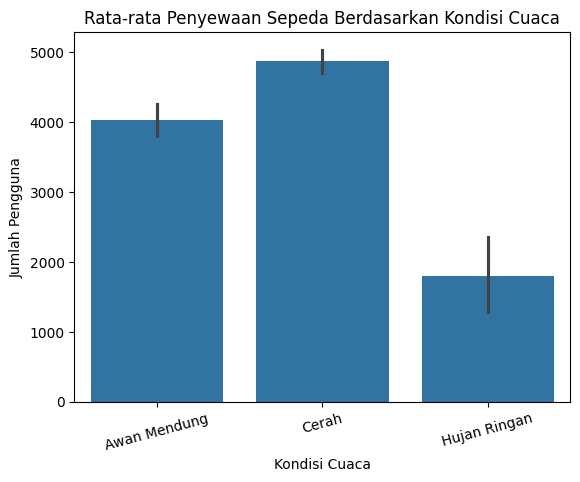

In [35]:
sns.barplot(x='weather_label', y='cnt', data=df)
plt.xticks(rotation=15)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Kondisi Cuaca")
plt.show()

**Insight:**
- Jawaban 1: Rata - rata sebaran pengguna sepada berdasarkan hari libur dan hari biasa (tidak libur) yaitu lebih rendah 21%. Dengan rata-rata 4.527 pengguna per hari, dibandingkan dengan 3.735 pengguna per hari pada hari libur nasional (holiday = 1). Hal ini menunjukan bahwa hari biasa menjadi hari dengan minat bersepeda lebih tinggi.

- Jawaban 2: Rata - rata penyewaan sepeda pada hari yang cerah cukup tinggi menunjukan pengguna cukup aktif pada hari yang cerah. Kemudian pada kondisi cuaca awan mendung, sedikit mengurangi minat pengguna untuk bersepeda. Kemudian penurunan yang cukup drastif pada kondisi hujan ringan yaitu bisa sampai 50% dibandingkan saat cerah.

## Analisis Lanjutan (Opsional)

In [36]:
# Mapping nama musim dan cuaca
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

df['season_name'] = df['season'].map(season_mapping)

# Buat kolom cluster berbasis kombinasi
def assign_cluster(row):
    if row["season_name"] == "Fall" and row["weathersit"] == 1 and row["workingday"] == 1:
        return "Optimal"
    elif row["season_name"] == "Spring" and row["weathersit"] >= 3 and row["workingday"] == 0:
        return "Risiko Rendah"
    elif row["season_name"] == "Summer" and row["weathersit"] == 1 and row["workingday"] == 0:
        return "Peluang Rekreasi"
    elif row["season_name"] == "Winter" and row["weathersit"] == 2 and row["workingday"] == 1:
        return "Operasional Minimum"
    else:
        return "Netral"


df["cluster"] = df.apply(assign_cluster, axis=1)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_label,season_name,cluster
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Awan Mendung,Spring,Netral
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Awan Mendung,Spring,Netral
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah,Spring,Netral
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah,Spring,Netral
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah,Spring,Netral


In [37]:
# Statistik Penyewaan per Cluster
df.groupby('cluster')['cnt'].agg(['mean', 'min', 'max', 'std'])

,mean,min,max,std
cluster,,,,
Netral,4144.359489,22,8714,1922.683344
Operasional Minimum,4726.489796,1096,7572,1569.367788
Optimal,5961.237113,3387,8173,1344.823260
Peluang Rekreasi,5821.194444,2496,8294,1496.600678
Risiko Rendah,2169.000000,2169,2169,NaN


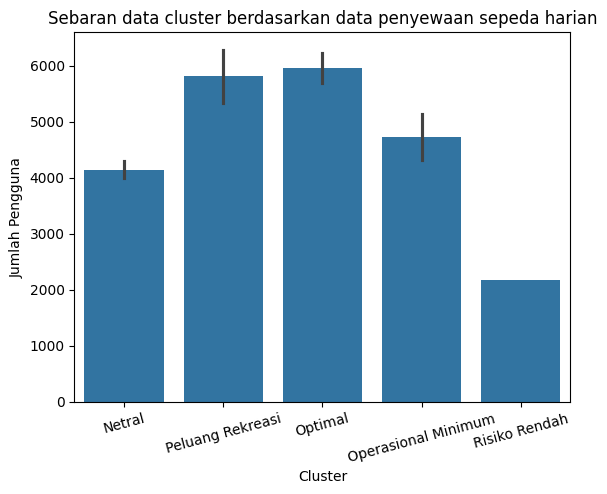

In [38]:
# Jumlah Data per Cluster
sns.barplot(x='cluster', y='cnt', data=df)
plt.xticks(rotation=15)
plt.title("Sebaran data cluster berdasarkan data penyewaan sepeda harian")
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Cluster")
plt.show()

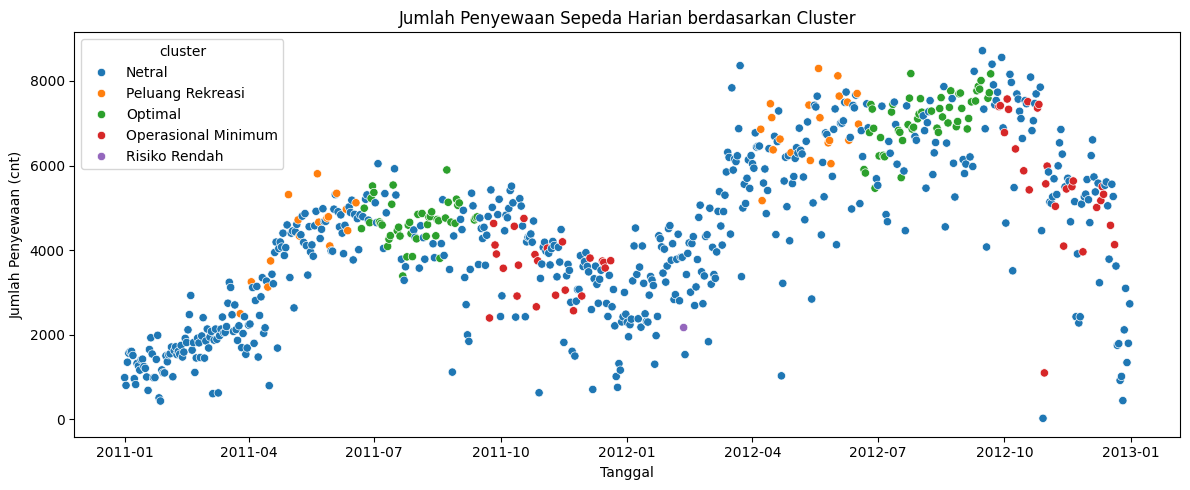

In [39]:
df['dteday'] = pd.to_datetime(df['dteday'])

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='dteday', y='cnt', hue='cluster', palette='tab10')
plt.title("Jumlah Penyewaan Sepeda Harian berdasarkan Cluster")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.tight_layout()
plt.show()

## Conclusion

- Berdasarkan pertanyaan yang ada, maka perbandingan antara hari libur dan hari biasa cukup berpengaruh pada penggunaan sepeda harian, selain itu faktor dari cuaca juga bisa menjadi parameter lain dalam penggunaan sepeda harian.
- Maka dari kedua parameter tersebut, kita bisa mendapat sebuah insight baru, yaitu membangun analisis gabungan antara cuaca + hari libur.
- Terdapat 4 kategori waktu bisnis yang bisa kita manfaatkan untuk operasional sepeda harian.
  - Peluang Rekreasi
  - Optional
  - Operasional Minimum
  - Resiko Rendah

Kita bisa simpulkan berdasarkan rentang waktu berdasarkan musim (per 3 bulan).

*   Winter (Desember, Januari, Februari)
  * Kita bisa turunkan operasional penggunaan sepeda harian, karena pada fase ini adalah musim dingin (hujan) sehingga pengguna harian sepeda cukup menurun pada bulan ini.
  
* Spring (Maret, April, Mei)
  * Pada bulan ini bisa dijadikan sebagai peluang rekreasi, karena setelah musim dingin orang - orang akan mencoba untuk mencari hiburan atau mungkin sudah mulai kembali beraktivitas

* Summer (Juni, Juli, Agustus)
  * Kuartal ini sudah masuk pada musim panas, dimana warga akan memilih berpergian menggunakan sepeda karena cerahnya hari. Pada momen ini kita bisa meningkatkan operasional sepeda.

* Fall (September, Oktober, November)
  * Kuartal ini sudah masuk pada musim panas, mulai terjadi penurunan tren karena menjelang musim dingin, pada fase ini kita memerlukan strategi atau menurunkan operasional.

